 Smart Energy Usage Optimization in Lighting

**Problem Statement:** 
Lighting overuse leads to unnecessary electricity consumption.  
**Goal:** Use AI/ML to predict household electricity usage patterns and recommend optimal lighting schedules that minimize wastage while maintaining comfort.

**Dataset:**  
UCI Individual Household Electric Power Consumption 

Importing necessary liberaries and loading data

In [21]:
import os

output_dir = "C:/Users/DSATM/Desktop/SmartLightningOptimization/Outputs"
os.makedirs(output_dir, exist_ok=True)

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Load data (make sure 'household_power_consumption.txt' is in your working directory)
df = pd.read_csv(
    r'C:\Users\DSATM\Desktop\SmartLightningOptimization\Data\household_power_consumption.txt',
    sep=';',
    na_values=['?'],
    parse_dates={'datetime': ['Date', 'Time']},
    infer_datetime_format=True,
    low_memory=False
)
df.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


Data Cleaning


In [24]:
import os

output_dir = r"C:\Users\DSATM\Desktop\SmartLightningOptimization\Outputs"
os.makedirs(output_dir, exist_ok=True)
df.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


Feature Engineering

In [25]:
# Extract hour and day of week
df['Hour'] = df['datetime'].dt.hour
df['DayOfWeek'] = df['datetime'].dt.dayofweek

# Aggregate to hourly data for clearer patterns
df_hourly = df.resample('H', on='datetime').mean().reset_index()
df_hourly.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hour,DayOfWeek
0,2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111,17.0,5.0
1,2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667,18.0,5.0
2,2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333,19.0,5.0
3,2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333,20.0,5.0
4,2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667,21.0,5.0


EDA

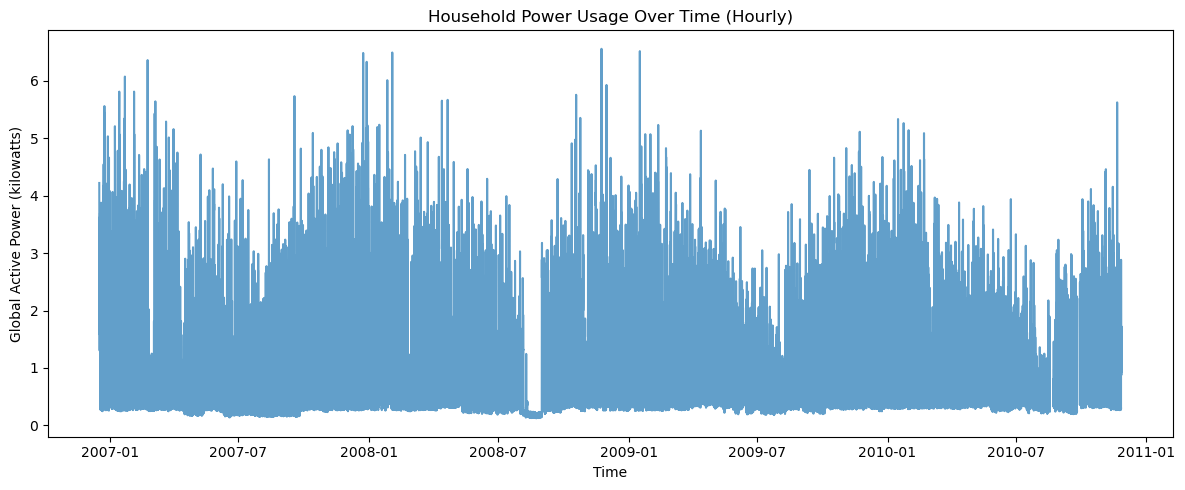

In [26]:
plt.figure(figsize=(12,5))
plt.plot(df_hourly['datetime'], df_hourly['Global_active_power'], alpha=0.7)
plt.title('Household Power Usage Over Time (Hourly)')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kilowatts)')
plt.tight_layout()
plt.savefig(f"{output_dir}/power_usage_time_series.png")
plt.show()

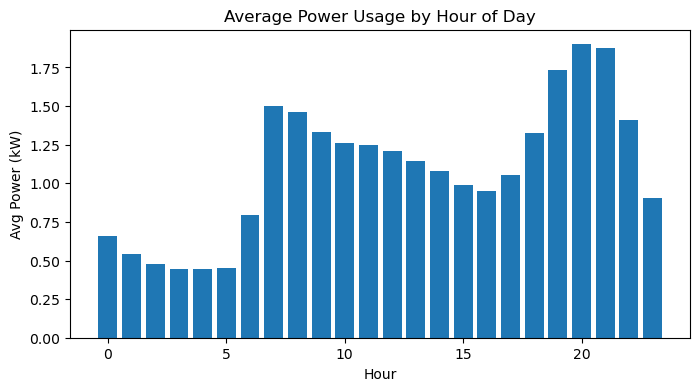

In [34]:
# Calculate average power usage by hour of day
hourly_pattern = df_hourly.groupby(df_hourly['datetime'].dt.hour)['Global_active_power'].mean()

plt.figure(figsize=(8,4))
plt.bar(hourly_pattern.index, hourly_pattern.values)
plt.title('Average Power Usage by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Avg Power (kW)')
plt.savefig(f"{output_dir}/average_hourly_usage.png")
plt.show()

Predective Modelling

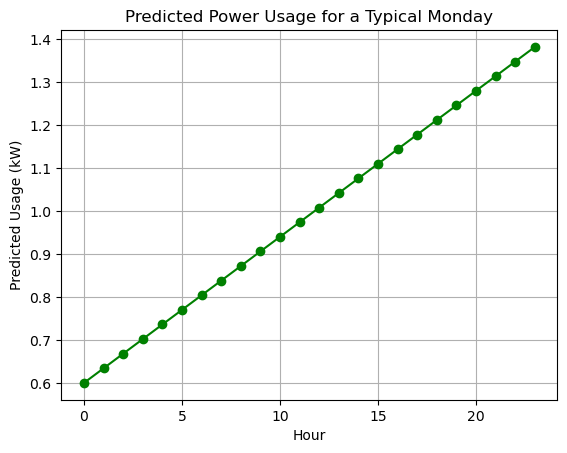

In [29]:
# Predict next hour's usage based on time features
df_hourly['NextHourUsage'] = df_hourly['Global_active_power'].shift(-1)
df_hourly.dropna(inplace=True)

X = pd.DataFrame({
    'Hour': df_hourly['datetime'].dt.hour,
    'DayOfWeek': df_hourly['datetime'].dt.dayofweek
})
y = df_hourly['NextHourUsage']

model = LinearRegression()
model.fit(X, y)

# Predict usage for a sample day (Monday)
sample_hours = np.arange(0, 24)
sample_dayofweek = 0  # Monday
sample_X = pd.DataFrame({'Hour': sample_hours, 'DayOfWeek': [sample_dayofweek]*24})
predicted_usage = model.predict(sample_X)

plt.plot(sample_hours, predicted_usage, marker='o', color='green')
plt.title('Predicted Power Usage for a Typical Monday')
plt.xlabel('Hour')
plt.ylabel('Predicted Usage (kW)')
plt.grid()
plt.savefig(f"{output_dir}/predicted_usage_monday.png")  # <-- This line saves the image!
plt.show()

Lighting Schedule Recommendation

In [ ]:
def recommend_lighting(hour, usage_pred):
    # Simple rules: adjust thresholds for your needs
    if 8 <= hour <= 18 and usage_pred < 1:
        return "Lights OFF or Dim"
    elif 7 <= hour <= 8 or 18 <= hour <= 22:
        return "Lights ON"
    else:
        return "Lights OFF"

print("Recommended Lighting Schedule for Monday:")
for hour, usage in zip(sample_hours, predicted_usage):
    action = recommend_lighting(hour, usage)
    print(f"{hour:02d}:00 - {action}")

Recommended Lighting Schedule for Monday:
00:00 - Lights OFF
01:00 - Lights OFF
02:00 - Lights OFF
03:00 - Lights OFF
04:00 - Lights OFF
05:00 - Lights OFF
06:00 - Lights OFF
07:00 - Lights ON
08:00 - Lights OFF or Dim
09:00 - Lights OFF or Dim
10:00 - Lights OFF or Dim
11:00 - Lights OFF or Dim
12:00 - Lights OFF
13:00 - Lights OFF
14:00 - Lights OFF
15:00 - Lights OFF
16:00 - Lights OFF
17:00 - Lights OFF
18:00 - Lights ON
19:00 - Lights ON
20:00 - Lights ON
21:00 - Lights ON
22:00 - Lights ON
23:00 - Lights OFF


recommendation in Visual format

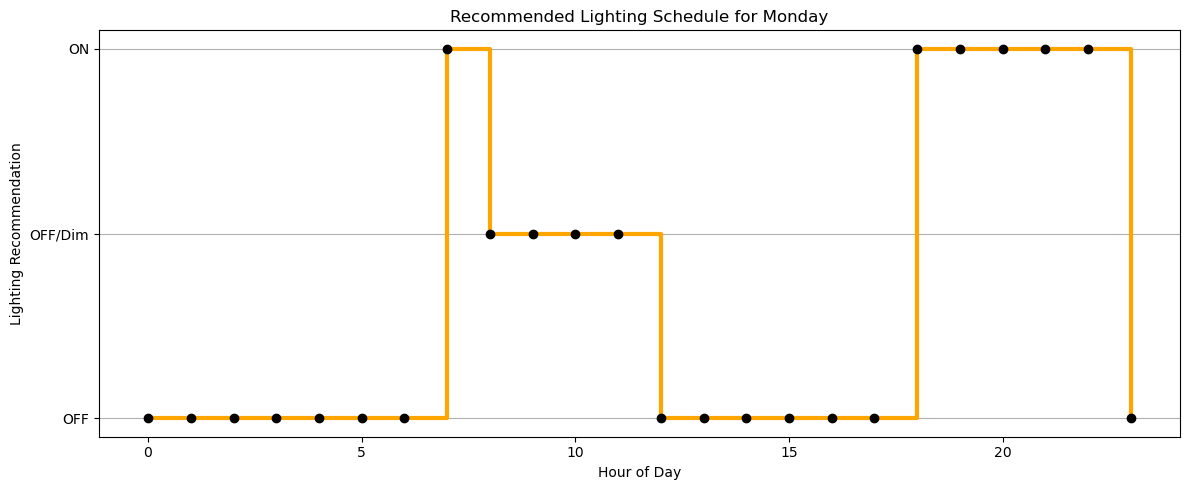

In [32]:
import matplotlib.pyplot as plt

# Prepare visual data for recommended lighting schedule
lighting_actions = []
for hour, usage in zip(sample_hours, predicted_usage):
    action = recommend_lighting(hour, usage)
    lighting_actions.append(action)

# Convert actions to numeric for plotting
action_map = {'Lights OFF': 0, 'Lights OFF or Dim': 0.5, 'Lights ON': 1}
action_numeric = [action_map[a] for a in lighting_actions]

plt.figure(figsize=(12,5))
plt.plot(sample_hours, action_numeric, drawstyle='steps-post', linewidth=3, color='orange')
plt.scatter(sample_hours, action_numeric, color='black', zorder=5)
plt.title('Recommended Lighting Schedule for Monday')
plt.xlabel('Hour of Day')
plt.ylabel('Lighting Recommendation')
plt.yticks([0, 0.5, 1], ['OFF', 'OFF/Dim', 'ON'])
plt.grid(axis='y')
plt.tight_layout()
plt.savefig(f"{output_dir}/lighting_schedule_monday.png")
plt.show()

In [35]:
for day in range(7):  # 0=Monday, 6=Sunday
    sample_X = pd.DataFrame({'Hour': sample_hours, 'DayOfWeek': [day]*24})
    predicted_usage = model.predict(sample_X)
    
    lighting_actions = [recommend_lighting(hour, usage) for hour, usage in zip(sample_hours, predicted_usage)]
    action_map = {'Lights OFF': 0, 'Lights OFF or Dim': 0.5, 'Lights ON': 1}
    action_numeric = [action_map[a] for a in lighting_actions]
    
    plt.figure(figsize=(12,5))
    plt.plot(sample_hours, action_numeric, drawstyle='steps-post', linewidth=3, color='orange')
    plt.scatter(sample_hours, action_numeric, color='black', zorder=5)
    plt.title(f'Recommended Lighting Schedule for Day {["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"][day]}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Lighting Recommendation')
    plt.yticks([0, 0.5, 1], ['OFF', 'OFF/Dim', 'ON'])
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig(f"{output_dir}/lighting_schedule_day{day}.png")
    plt.close()
